# K-Nearest Neighbors

## K_Nearest Neighbors Classifier

We want to predict whether a movie's IMDb rating is above or below 7.0. We will do this with K_Nearest Neighbor Classifier. <br/>
We will implement the three steps of the K-Nearest Neighbor Algorithm:

1.    Normalize the data
2.    Find the k nearest neighbors
3.    Classify the new point based on those neighbors

### Load data

In [1]:
from movies import training_set, training_labels, validation_set, validation_labels, movie_dataset, movie_ratings

### Data with Different Scales: Normalization

In [2]:
def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized=[]
  for element in lst:
    value = (element - minimum)/(maximum - minimum)
    normalized.append(value)
  return normalized

### Distance Between Points
We need to define what it means for two points to be close together or far apart.

In [3]:
def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

### Classify an Unknown Point Based on its K-Nearest Neighbors

In [4]:
def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0

To begin, we want to make sure the movie that we want to classify isn’t already in our database. This is important because we don’t want one of the nearest neighbors to be itself! Then we compare our classifier for `Bee Movie` and its actual label.

In [5]:
print("Bee Movie" in training_set)

False


In [6]:
print("movies feature:", validation_set["Bee Movie"])
print("actual label:", validation_labels["Bee Movie"])

guess=classify(validation_set["Bee Movie"], training_set, training_labels, 5)
print("our classifier prediction:",guess)
if guess == validation_labels["Bee Movie"]:
  print("Our predition is correct!")
else:
  print("Our predition is wrong!")

movies feature: [0.012279463360232739, 0.18430034129692832, 0.898876404494382]
actual label: 0
our classifier prediction: 0
Our predition is correct!


### find_validation_accuracy

In [7]:
def find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, k):
  num_correct = 0.0
  for title in validation_set:
    guess = classify(validation_set[title], training_set, training_labels, k)
    if guess == validation_labels[title]:
      num_correct += 1
  return num_correct / len(validation_set)

accuracy of our model with k = 3

In [8]:
print(find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, 3))

0.6639344262295082


### Finding the best K

Validation accuracy will change depending on what K we use. In the next exercise, we’ll use the validation accuracy to pick the best possible K for our classifier.

In [9]:
accuracies = []
for k in range(10,45):
 accuracies.append(find_validation_accuracy(training_set,
                                            training_labels,
                                            validation_set,
                                            validation_labels,
                                            k))

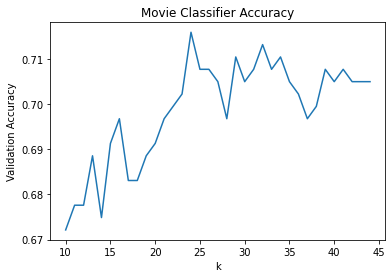

In [10]:
from matplotlib import pyplot as plt

k_list = range(10,45)
plt.plot(k_list ,accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Movie Classifier Accuracy')
plt.show()

In [11]:
best_k = 23
print(find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, best_k))

0.7021857923497268


### Graphing the results with Sklearn

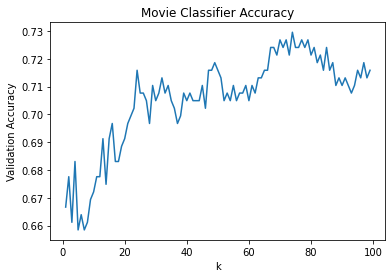

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


accuracies = []
for k in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(list(training_set.values()), list(training_labels.values()))
    accuracies.append( classifier.score(
        list(validation_set.values()), list(validation_labels.values())
    ))
    

k_list = range(1,100)
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Movie Classifier Accuracy')
plt.show()

## K_Nearest Neighbors Regressor

Instead of classifying a new movie as either good or bad, we are now going to predict its IMDb rating. The variable neighbors stores a list  of `[distance, title]` pairs. Instead of counting the number of good and bad neighbors, we calculate averages of the neighbor's IMDb ratings.

In [13]:
def predict(unknown, dataset, movie_ratings, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]

  total = 0
  for neighbor in neighbors:
    title = neighbor[1]
    total += movie_ratings[title]
  return total/k

We have the normalized budget, runtime, and year of the movie as [0.016, 0.300, 1.022]. So we can perdict its rating.

In [14]:
print(predict([0.016, 0.300, 1.022], movie_dataset,movie_ratings, 5 ))

6.859999999999999


### Weighted Regression

 We can compute a weighted average based on how close each neighbor is. Now we redo our predict() function so it computes the weighted average. 

In [15]:
def predict(unknown, dataset, movie_ratings, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  numerator = 0
  denominator = 0
  for neighbor in neighbors:
    rating = movie_ratings[neighbor[1]]
    distance_to_neighbor = neighbor[0]
    numerator += rating / distance_to_neighbor
    denominator += 1 / distance_to_neighbor
  return numerator / denominator

In [16]:
print(predict([0.016, 0.300, 1.022], movie_dataset, movie_ratings, 5))

6.849139678439045


### KNeighborsRegressor in Sklearn

These three lists are the features for the normalized budget, runtime, and year of release for three movies we want
to perdict rating for them.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

regressor.fit(list(movie_dataset.values()), list(movie_ratings.values()))

unknown_point = [
  [0.016, 0.300, 1.022] ,
  [0.0004092981, 0.283, 1.0112] ,
  [0.00687649, 0.235, 1.0112]
  ]

gusses = regressor.predict(unknown_point)

print(gusses)

[6.84913968 5.47572913 6.91067999]
